In [34]:
#imports
import numpy as np
import scipy.signal as signal
from pyedflib import highlevel
from os import listdir, makedirs
from os.path import isfile, join, splitext, isdir

In [35]:
class SignalProcessingTool:
    patientData = dict()

    def __init__(self, dataFolderPath = '../data'):
        self.filesName = [splitext(file)[0] for file in listdir(path) if isfile(join(path, file)) and 'MANIFEST' not in file] #TODO: wczytywać nazwy bezpośrednio z manifestu + ew. validacja
        self.filesList = [join(dataFolderPath, f'{file}.edf') for file in self.filesName]


    def getHeaders(self, file):
        """Return label from readed file
        Returns:
            labelList(String[]): List of electrodes used on patient
        """
        return [headerInfo['label'] for headerInfo in highlevel.read_edf(file)[1]]
    

    def createCSVFile(self, data, headersLabel, fileName):
        """Create csv file from data
        Parameters:
            data(Any): Data used to save
            headersLabel(String[]): Labels for header
            fileName(String): Name of file
        """
        import pandas as pd
        dictForCSV = dict()
        for index, column in enumerate(data):
            dictForCSV[headersLabel[index]] = column
        pd.DataFrame(dictForCSV).to_csv(f'../output/{fileName}.csv', index = False)

    
    def interactiveInput(self):
        """Interactive mode for drawing every wavelenght for any patient"""
        printStr = 'Choose one patient from below:\n'
        for index, patient in enumerate(self.filesName):
            printStr += f'{index} - {patient} '
        
        choosenPatient = int(input(printStr+'\n'))

        printStr = 'Choose one option from below:\n'
        for index, label in enumerate(self.getHeaders(self.filesList[0])):
            printStr += f'{index} - {label} '
        
        choosenOption = int(input(printStr+'\n'))
        self.drawPlot(choosenPatient, choosenOption)


    def drawPlot(self, fileName, option):
        """Draw wavelenght from edf file
        Parameters:
            fileName(String): Name of file
            option(String): Choosen wave to draw
        """
        import matplotlib.pyplot as plt
        choosenOptionLabel = self.getHeaders(self.filesList[fileName])[option]
        signals = highlevel.read_edf(self.filesList[fileName])[0]
        data = signal.resample(signals.T, 6250)

        t1 = np.arange(0, 231250, 1)
        t2 = np.arange(0, 231250, 37)

        plt.plot(t1 / 9250, signals[option], 'r', label='Before resampling')
        plt.plot(t2 / 9250, data.T[option], 'g', label='After resampling')
        plt.title(f'Patient: {self.filesName[fileName]} - Electrode: {choosenOptionLabel}')
        plt.legend()
        plt.xlabel("Time")
        plt.ylabel("Voltage [µV]")
        plt.show()


    def loadEDFAndSampleData(self, isFileRequired = False):
        """Draw wavelenght from edf file
        Parameters:
            isFileRequired(Boolean): Should data save to variables or files
        """
        for index, file in enumerate(self.filesList):

            if isFileRequired:
                outputFolder = '../output'
                if not isdir(outputFolder):
                    makedirs(outputFolder)
                if not isfile(join(outputFolder, f'{self.filesName[index]}.csv')):
                    signals, _, _  = highlevel.read_edf(file)
                    data = signal.resample(signals.T, 6250)
                    self.createCSVFile(data.T, self.getHeaders(self.filesList[index]), self.filesName[index])

            else:
                signals, _, _  = highlevel.read_edf(file)
                headers = np.array(self.getHeaders(self.filesList[index]))
                data = np.vstack((headers,signal.resample(signals.T, 6250)))
                self.patientData[self.filesName[index]] = data

In [36]:
# loading data from file
test = SignalProcessingTool('..\dataverse_files')
test.loadEDFAndSampleData(isFileRequired=True)

In [37]:
test.createCSVFile()

TypeError: createCSVFile() missing 3 required positional arguments: 'data', 'headersLabel', and 'fileName'

Choose one patient from below:
0 - h01 1 - h02 2 - h03 3 - h04 4 - h05 5 - h06 6 - h07 7 - h08 8 - h09 9 - h10 10 - h11 11 - h12 12 - h13 13 - h14 14 - s01 15 - s02 16 - s03 17 - s04 18 - s05 19 - s06 20 - s07 21 - s08 22 - s09 23 - s10 24 - s11 25 - s12 26 - s13 27 - s14 
0
Choose one option from below:
0 - Fp2 1 - F8 2 - T4 3 - T6 4 - O2 5 - Fp1 6 - F7 7 - T3 8 - T5 9 - O1 10 - F4 11 - C4 12 - P4 13 - F3 14 - C3 15 - P3 16 - Fz 17 - Cz 18 - Pz 
0


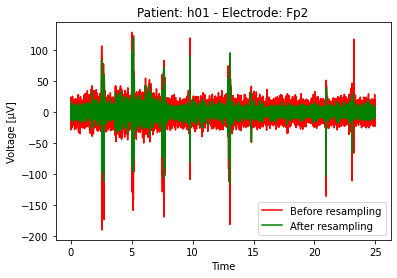

In [40]:
test.interactiveInput()